# Diabetes prediction Exploration

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load data
df_raw = pd.read_csv('../data/raw/diabetes_raw.csv')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
df_raw.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.dropna()
df_baking['outcome'] = df_baking['outcome'].map({0: 'no_diabetes', 1: 'diabetes'}).astype('category')

display(df_baking.head())
display(df_baking.info())

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,diabetes
1,1,85,66,29,0,26.6,0.351,31,no_diabetes
2,8,183,64,0,0,23.3,0.672,32,diabetes
3,1,89,66,23,94,28.1,0.167,21,no_diabetes
4,0,137,40,35,168,43.1,2.288,33,diabetes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pregnancies               768 non-null    int64   
 1   glucose                   768 non-null    int64   
 2   bloodpressure             768 non-null    int64   
 3   skinthickness             768 non-null    int64   
 4   insulin                   768 non-null    int64   
 5   bmi                       768 non-null    float64 
 6   diabetespedigreefunction  768 non-null    float64 
 7   age                       768 non-null    int64   
 8   outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


None

In [17]:
df = df_baking.copy()
save_path = '../data/processed/diabetes_clean.csv'
df.to_csv(save_path, index=False)

# Exploratory Analysis

In [18]:
display(df.describe(include='number').T)
display(df.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


,count,unique,top,freq
outcome,768,2,no_diabetes,500


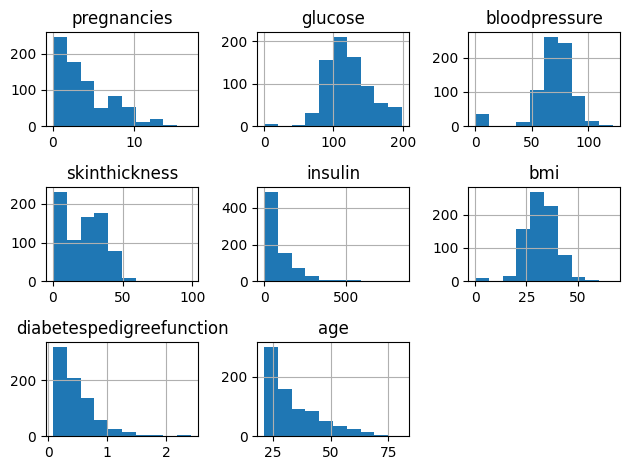

In [19]:
df.hist()
plt.tight_layout()
plt.show()

# Numerical insights
- Glucose, bloodpressure, and bmi are almost simetrical with few outliers. 
- The pregnancies distribution show a positive skewness. Most people have had 3 or less pregnancies, while there are some extreme outliers up to 17 pregnancies. 
- Most people in the data set are between 24 up to 50 years old. 
- The diabetes pedigree function shows a positive skewness with most values going between 0 and 1. 
- Skin thickness distribution is relatively flat with some peaks at 0 and around 30. 
- There are almost half as much people on the data set that don't have diabetes in comparison with those who do. 

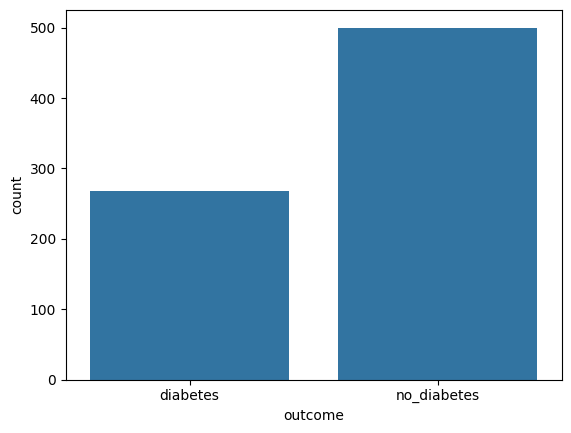

In [20]:
sns.countplot(data=df, x='outcome')
plt.show()

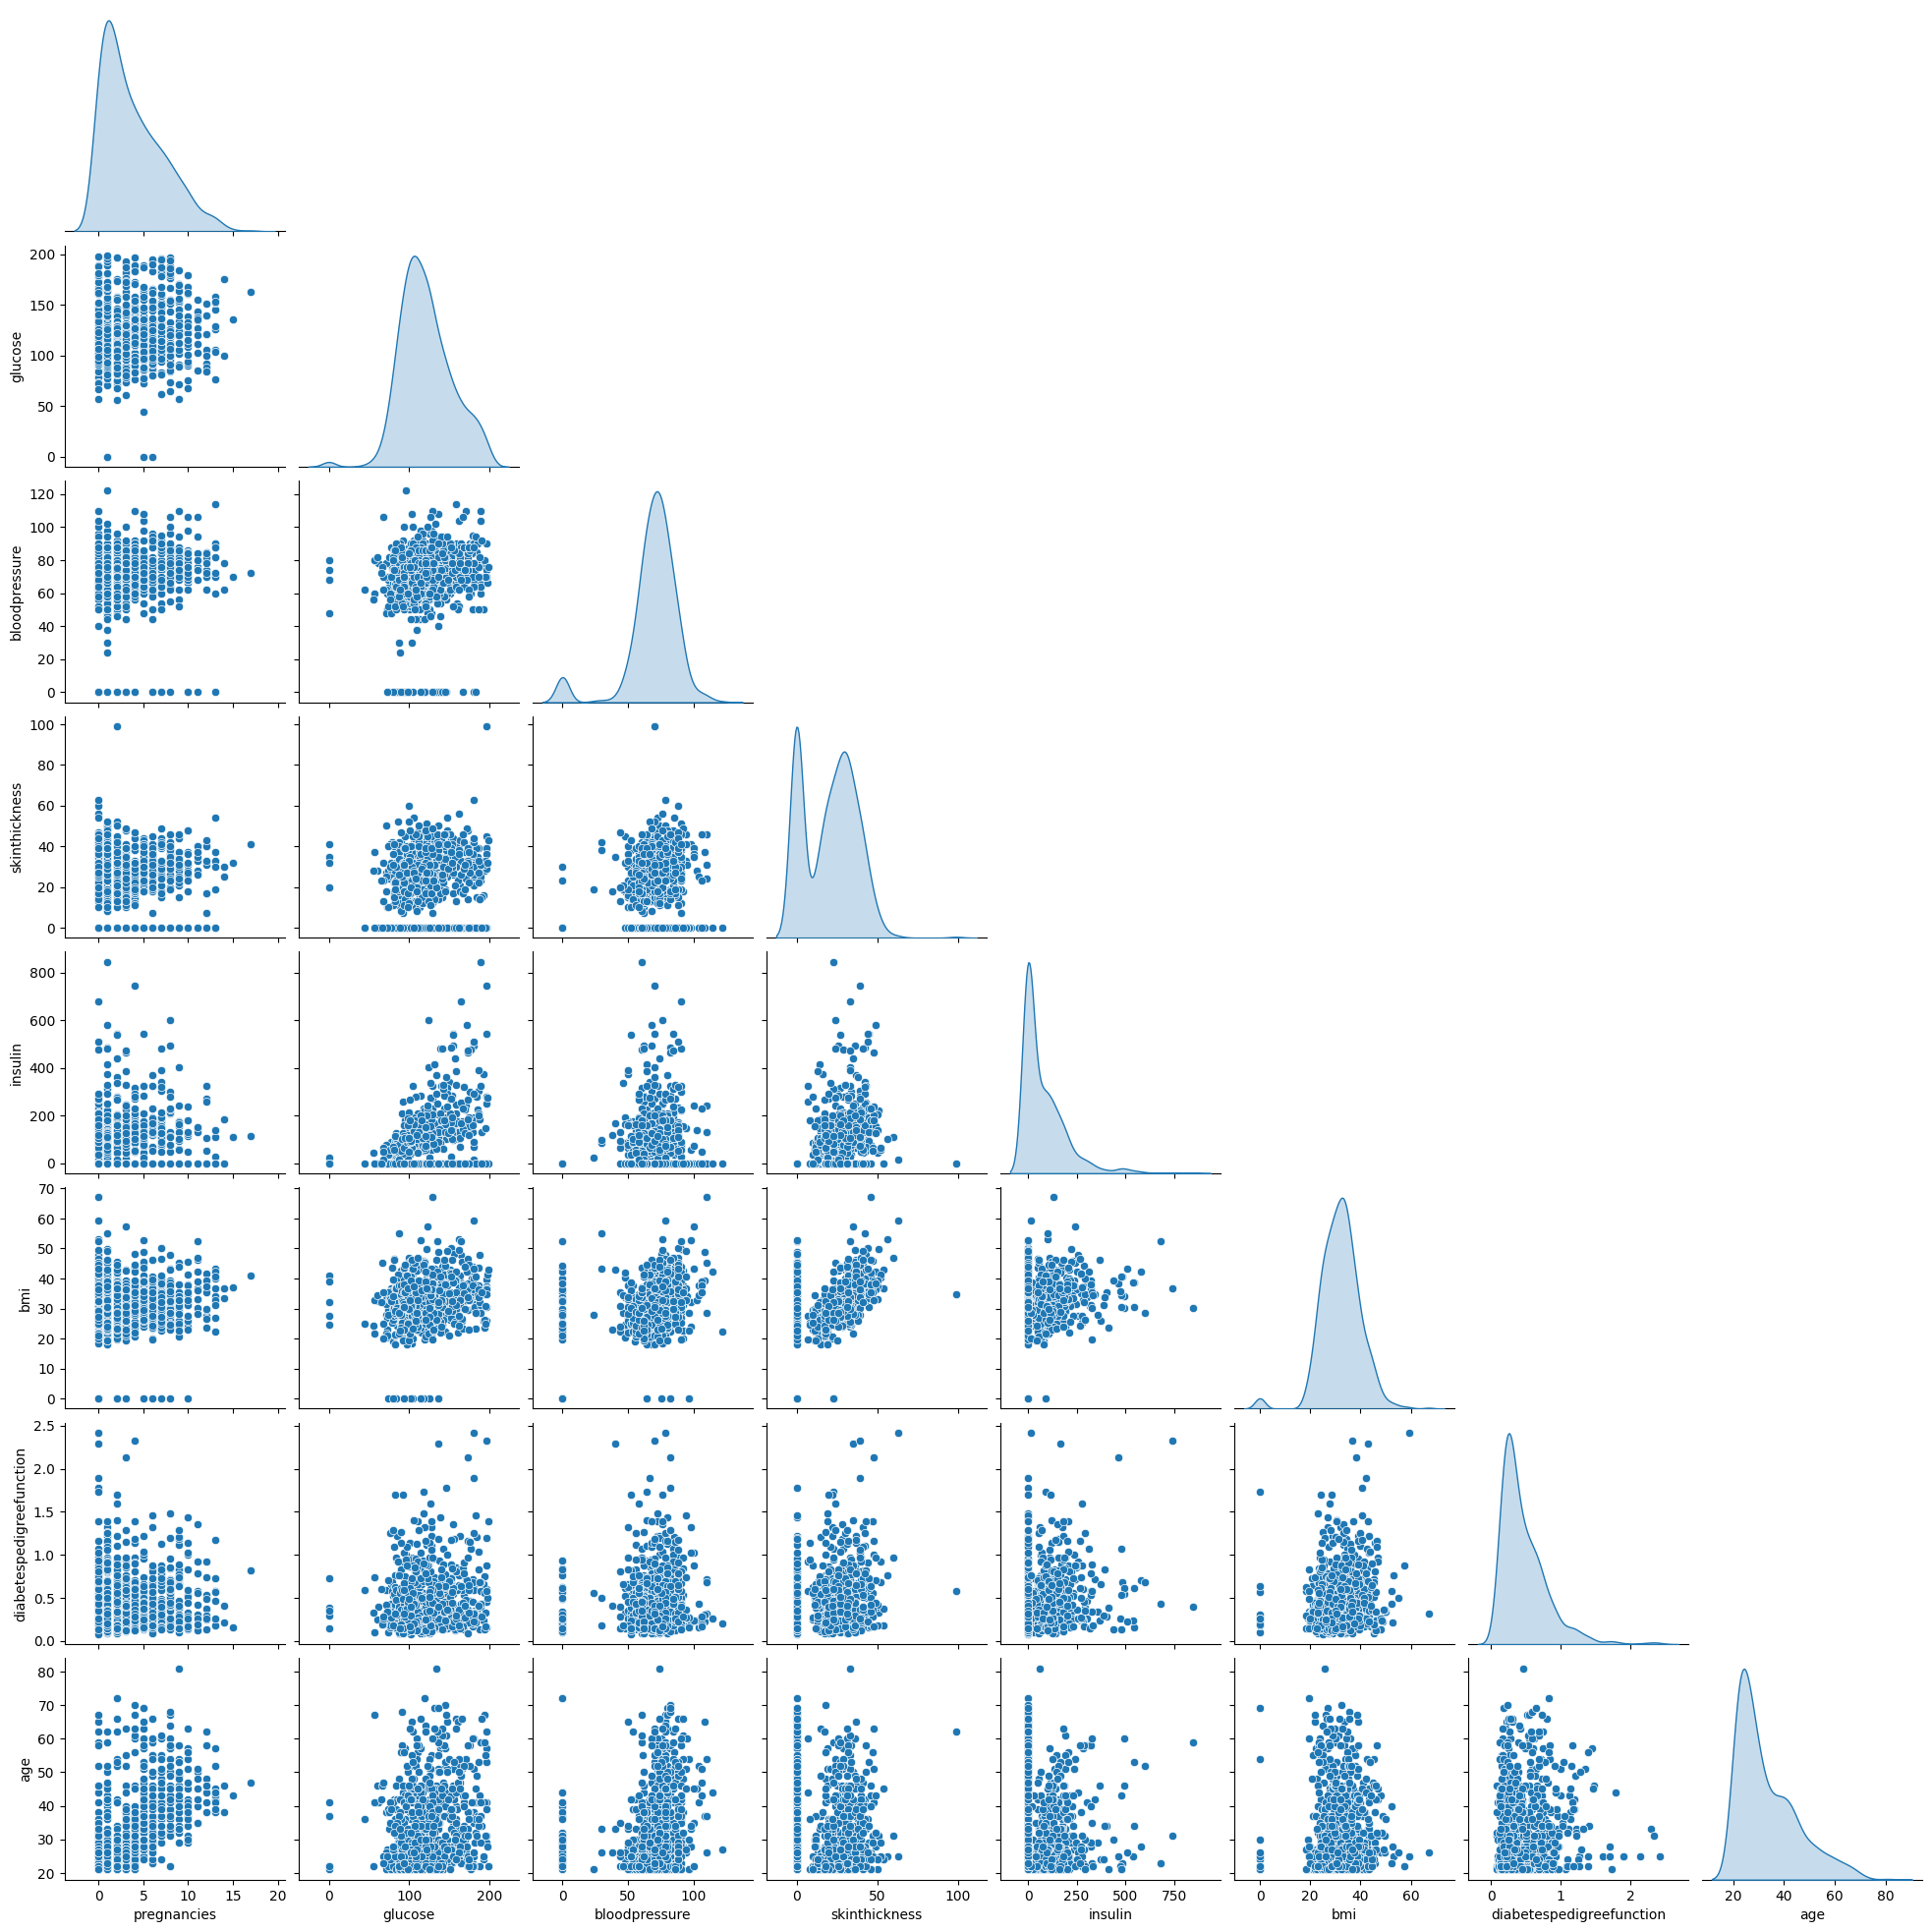

In [21]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

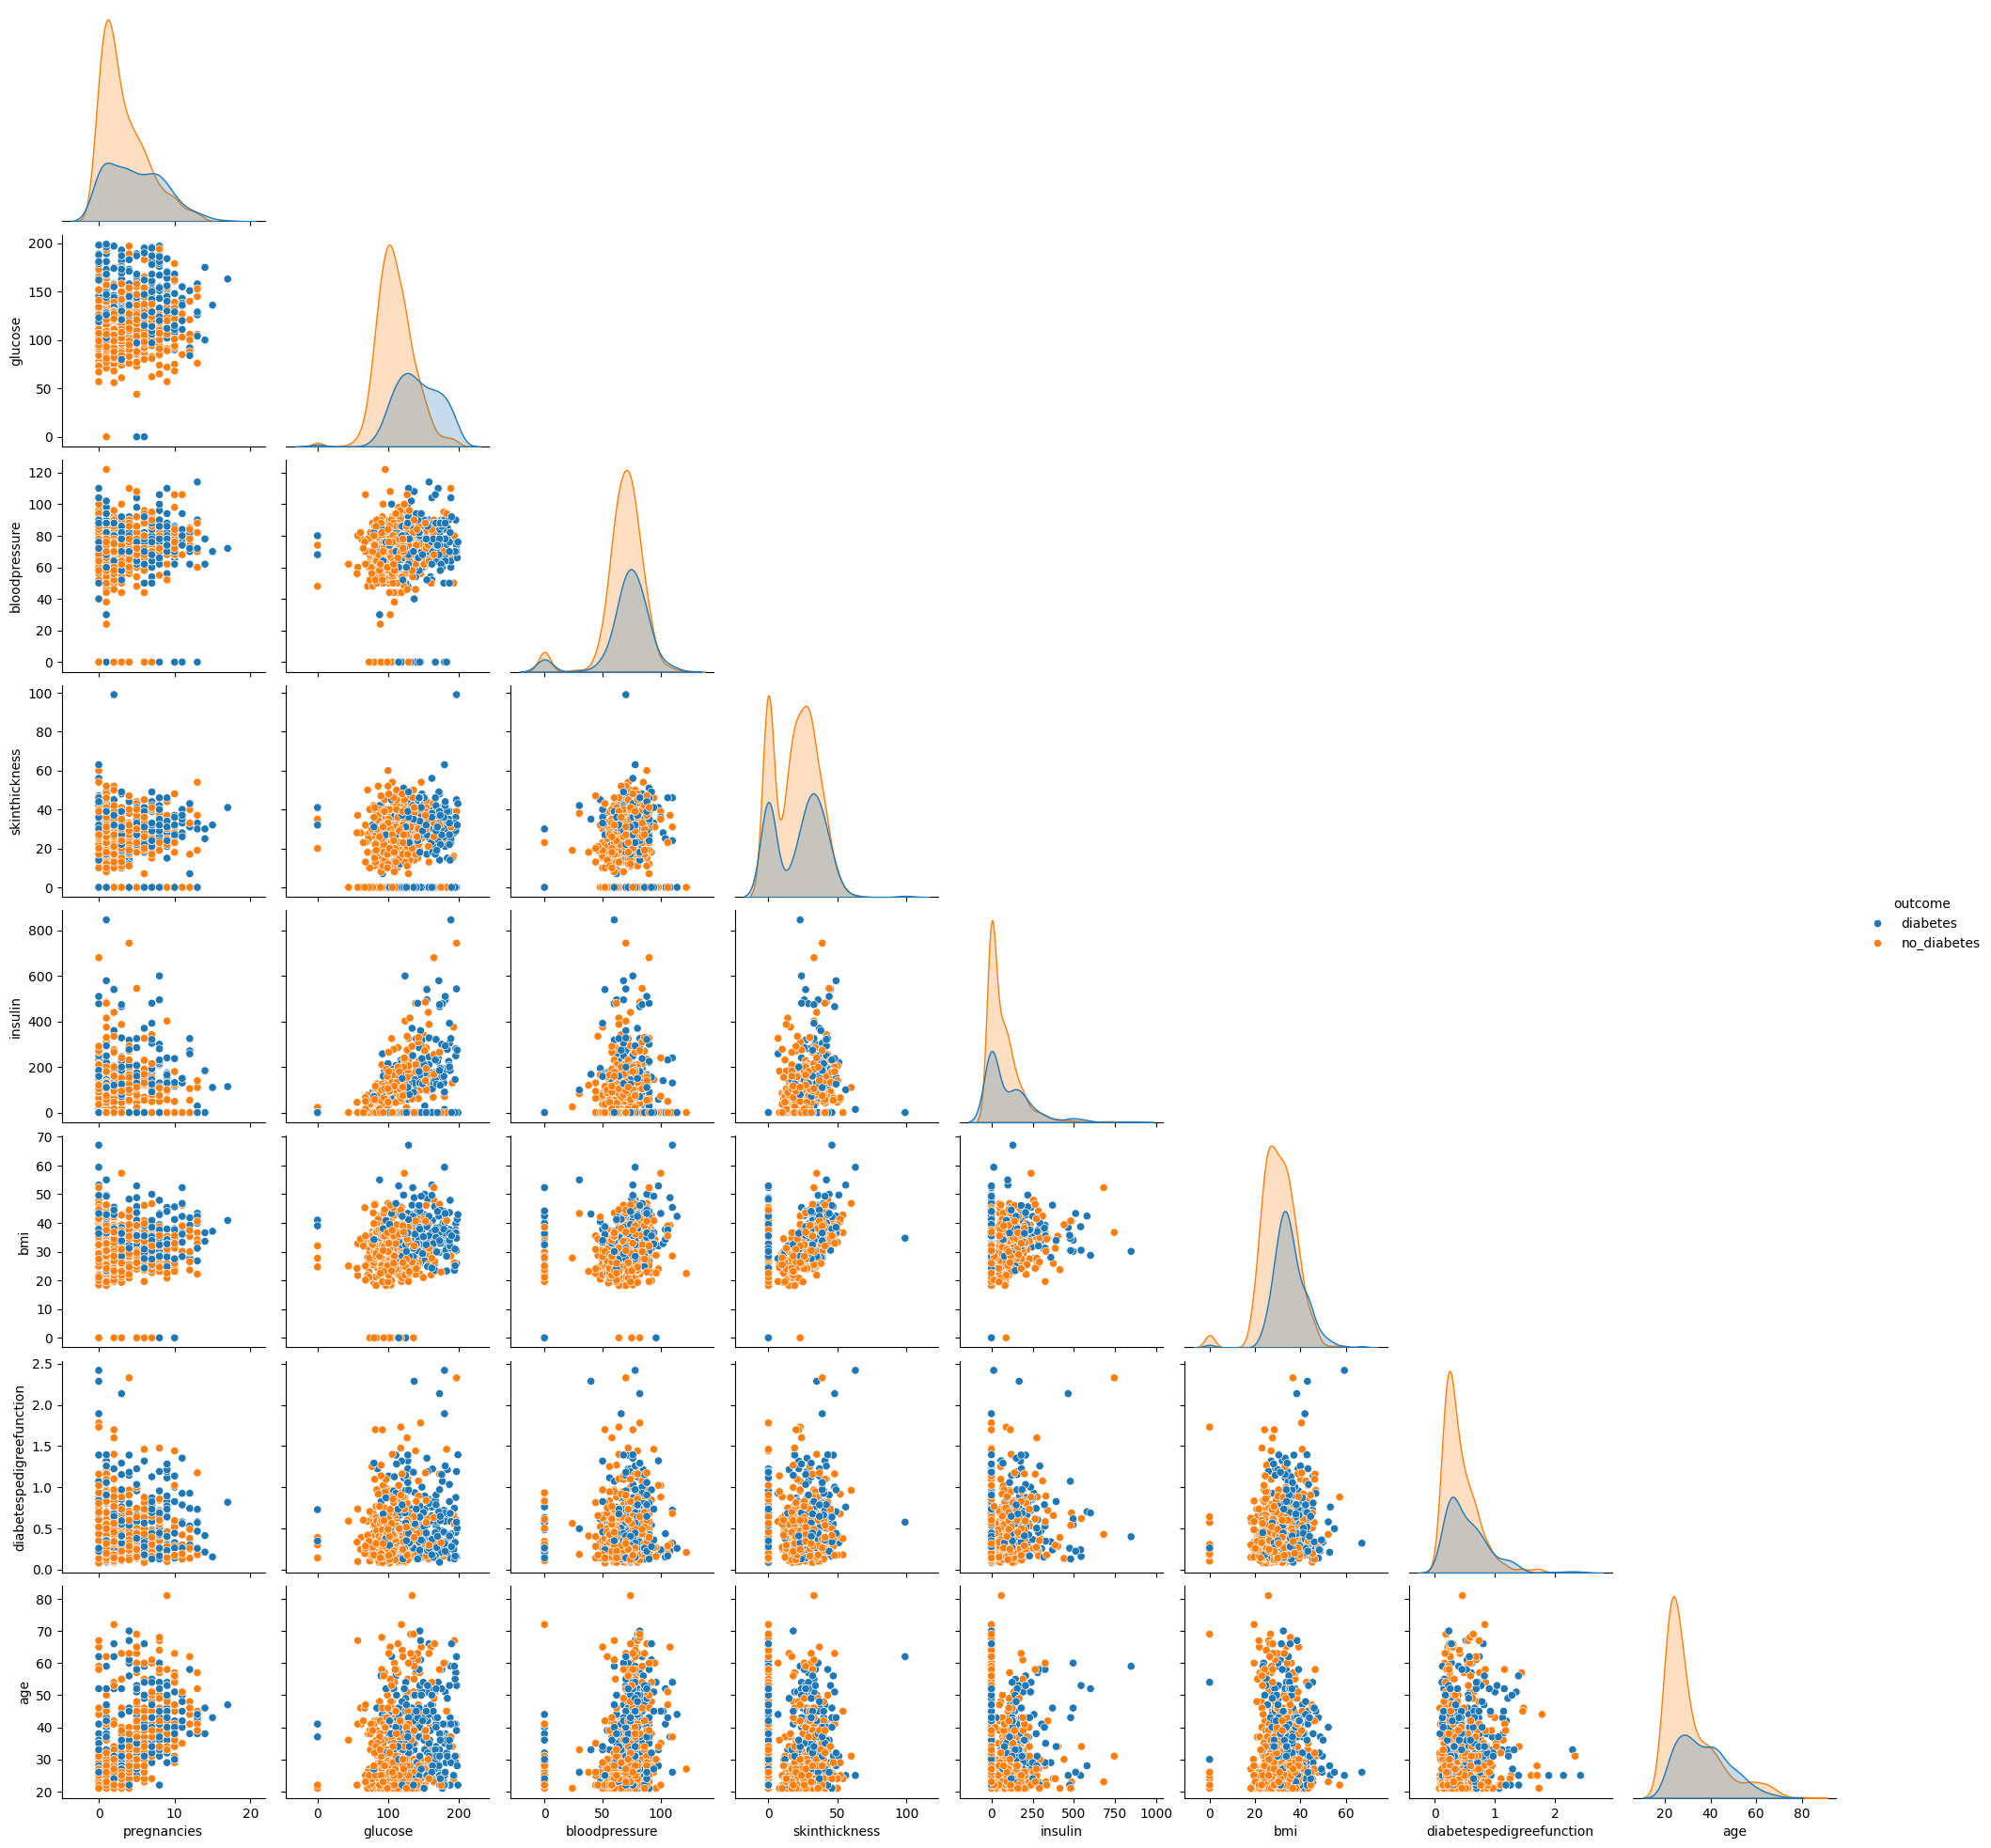

In [22]:
sns.pairplot(df, diag_kind='kde', corner=True, hue='outcome')
plt.show()

# Categorical Insights
- There is no clear visual relationship between most of the variables.
- Insulin and glucose are physiologically correlated. More glucose = more insulin, which can be seen in the graph. 
- Most people with diabetes tend to have higher glucose levels. 
- Skin thickness and bmi also show a positive linear relation. Higher bmi result in more skin thickness. 

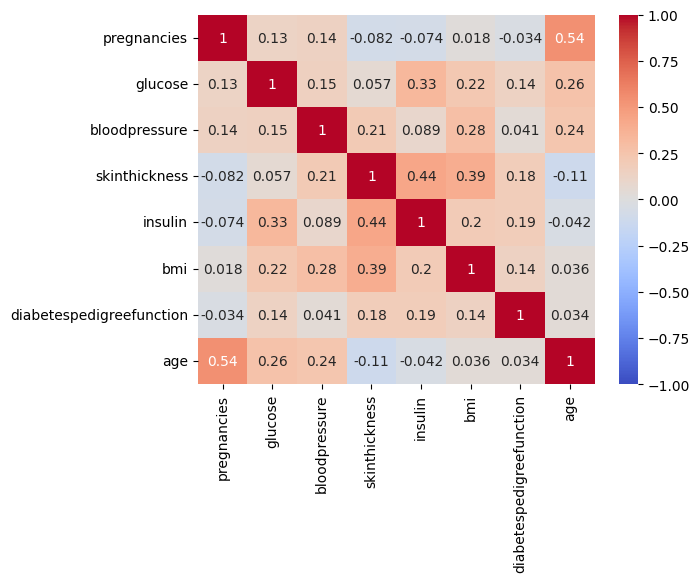

In [23]:
sns.heatmap(df.select_dtypes('number').corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()